<a href="https://colab.research.google.com/github/ricardoxam/POD/blob/main/Analise_POD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de Analise de Dados

Adicionar algum texto relativo ao objeto de estudo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("/content/EDA_Industrializados_202111.csv",sep=';', encoding='latin1', engine='python', error_bad_lines=False)

<ipython-input-2-9a29e00b0a72>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/EDA_Industrializados_202111.csv",sep=';', encoding='latin1', engine='python', error_bad_lines=False)
Skipping line 117985: unexpected end of data


**Dicionário de Dados**

* `Ano_Venda` - Ano que foi realizada a venda do medicamento
* `Mes_Venda` - Mês que foi realizada a venda do medicamento
* `UF_Venda` - Estado que foi realizado a venda
* `Municipio_Venda` - Municipio que foi realizada a venda
* `Principio_Ativo` - Principais Substâncias que compõe
* `Descriçao_apresentacao` - Descrição da caixa do medicamento
* `Qnt_Vendida` - Quantidade vendida
* `Unidade_Medida` - Unidade utilizada para contabilização
* `Conselho_Prescritor` - Conselho responsável pela prescrição
* `UF_Conselho_Prescritor` - Estado do conselho responsavel
* `Tipo_Receituario` - Númeração relativa ao tipo de receita médica.
* `CID10` - Relativa a doença que será tratada
* `Sexo` - Se feminino ou masculino
* `Idade` - Valor da idade
* `Unidade_Idade` - Não foi possivel identificar

In [ ]:
# Apresentando as 5 primeiras entradas.
df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
#Volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))

#Tipos de dados encontrados no DataFrame
display(df.dtypes)

Entradas: 	 117983
Variáveis: 	 15



ANO_VENDA                   int64
MES_VENDA                   int64
UF_VENDA                   object
MUNICIPIO_VENDA            object
PRINCIPIO_ATIVO            object
DESCRICAO_APRESENTACAO     object
QTD_VENDIDA                 int64
UNIDADE_MEDIDA             object
CONSELHO_PRESCRITOR        object
UF_CONSELHO_PRESCRITOR     object
TIPO_RECEITUARIO          float64
CID10                      object
SEXO                      float64
IDADE                     float64
UNIDADE_IDADE             float64
dtype: object

###Q2 Qual a porcentagem de valores ausentes no *dataset*?

In [6]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

CID10                     0.998635
SEXO                      0.377851
IDADE                     0.377851
UNIDADE_IDADE             0.377851
PRINCIPIO_ATIVO           0.001907
ANO_VENDA                 0.000000
MES_VENDA                 0.000000
UF_VENDA                  0.000000
MUNICIPIO_VENDA           0.000000
DESCRICAO_APRESENTACAO    0.000000
QTD_VENDIDA               0.000000
UNIDADE_MEDIDA            0.000000
CONSELHO_PRESCRITOR       0.000000
UF_CONSELHO_PRESCRITOR    0.000000
TIPO_RECEITUARIO          0.000000
dtype: float64

###  **DADOS AUSENTES**
* É possivel observar que a coluna `CID10` possui aproximadamente 99,8% dos valores nulos
* As variáveis `Sexo` e `Idade` possuem valores nulos em quase 40% dos casos.
* A variável `Principio Ativo` possui quase 2% de seus valores nulos.
* A variável `Tipo de receituario` possui menos de 1% de seus valores nulos.

### **Q3. Qual o tipo de  distribuição entre as variáveis?**

Para identificiar a distribuição das variáveis, vamos plotar um histograma.



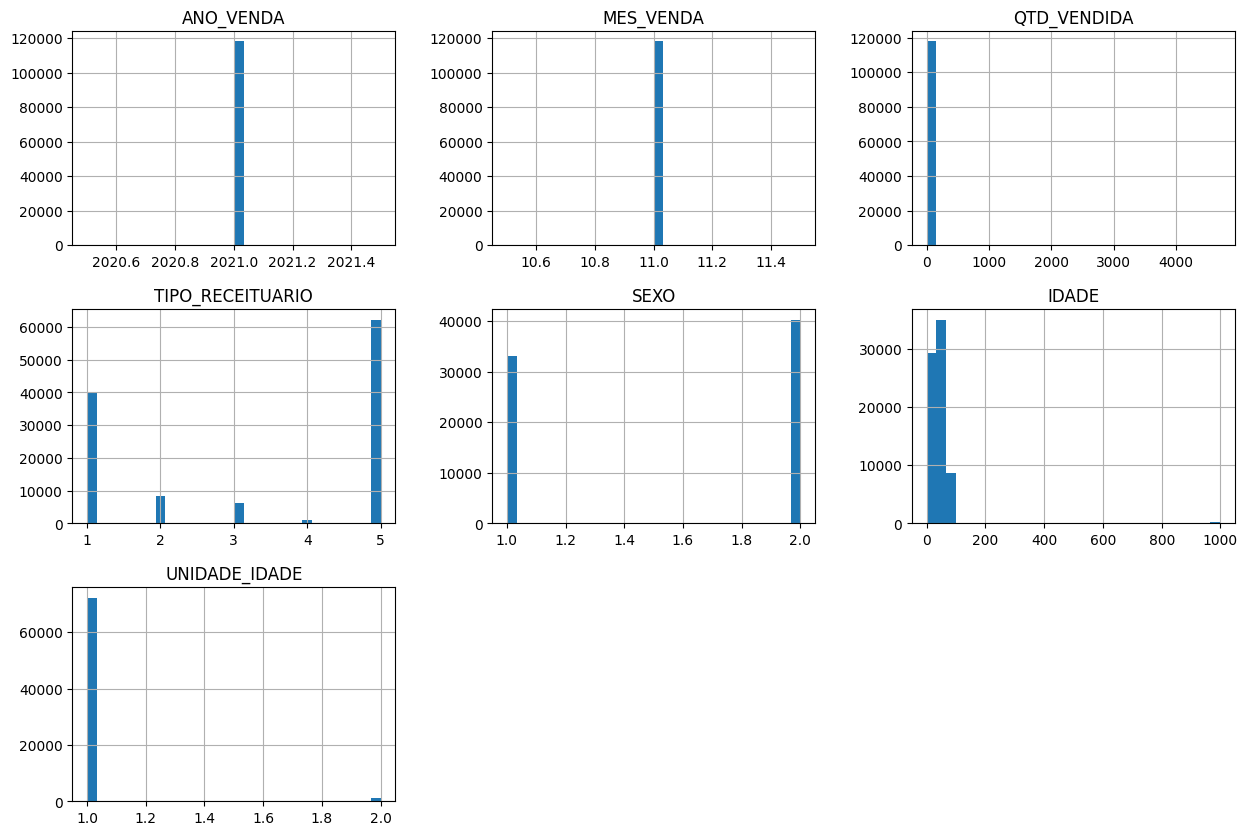

In [5]:
df.hist(bins=30,figsize=(15,10));

Observamos que a distribuição por gráfico não é tão boa, vamos explorar um pouco mais as informações para retirar algum feedback delas.

## Analisando a presença de Outliers

In [7]:
df[['QTD_VENDIDA','IDADE','UNIDADE_IDADE','MES_VENDA','ANO_VENDA','UNIDADE_IDADE', 'TIPO_RECEITUARIO']].describe()

,QTD_VENDIDA,IDADE,UNIDADE_IDADE,MES_VENDA,ANO_VENDA,UNIDADE_IDADE,TIPO_RECEITUARIO
count,117983.000000,73403.000000,73403.000000,117983.0,117983.0,73403.000000,117983.000000
mean,3.993440,41.367819,1.015394,11.0,2021.0,1.015394,3.316512
std,32.387334,49.535057,0.123117,0.0,0.0,0.123117,1.856595
min,1.000000,0.000000,1.000000,11.0,2021.0,1.000000,1.000000
25%,1.000000,25.000000,1.000000,11.0,2021.0,1.000000,1.000000
50%,1.000000,39.000000,1.000000,11.0,2021.0,1.000000,5.000000
75%,3.000000,55.000000,1.000000,11.0,2021.0,1.000000,5.000000
max,4706.000000,999.000000,2.000000,11.0,2021.0,2.000000,5.000000


## Analisando a presença de Outliers
Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* Observamos que a variável `QT_VENDIDA` possui 75% dos valores abaixo de 3, porém o seu valor máximo é 4825.
* Vemos que a Idade tem valor máximo de 999 anos.
* Notamos que a maioria dos receituários estão na categoria 5


#### Boxplot para a idade

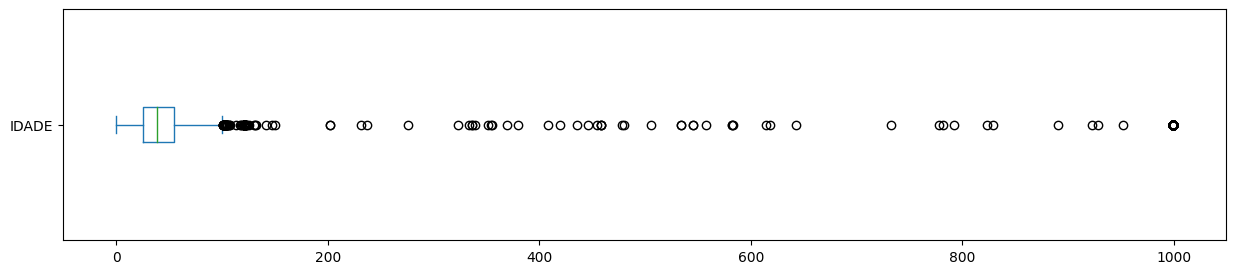

Idade: valores acima de 100
267 entradas
0.2263%


In [8]:
df.IDADE.plot(kind='box',vert=False, figsize=(15, 3))
plt.show()

# Quantidade de valores acima de 100 para Idade
print("Idade: valores acima de 100")
print("{} entradas".format(len(df[df.IDADE > 100])))
print("{:.4f}%".format((len(df[df.IDADE > 100])/ df.shape[0]*100)))

#### Boxplot para QNT_VENDIDA


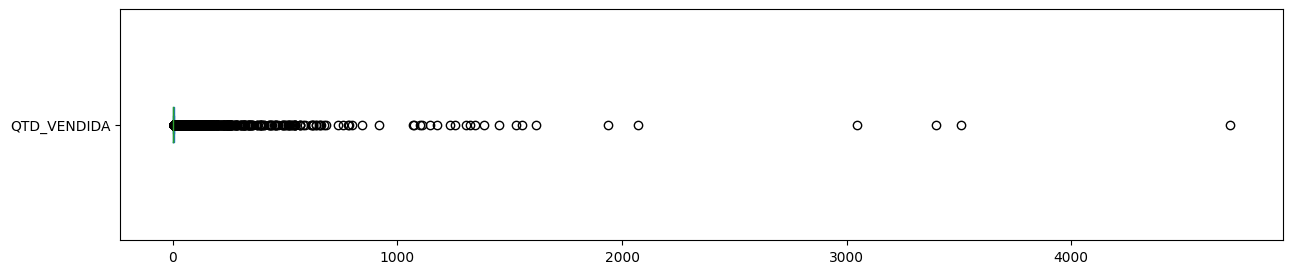


quantidade vendida: valores acima de 10
5133 entradas
4.3506%


In [9]:
# Quantidade Vendida
df.QTD_VENDIDA.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 10
print("\nquantidade vendida: valores acima de 10")
print("{} entradas".format(len(df[df.QTD_VENDIDA > 10])))
print("{:.4f}%".format((len(df[df.QTD_VENDIDA > 10]) / df.shape[0])*100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `IDADE` e `QTD_VENDIDA`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

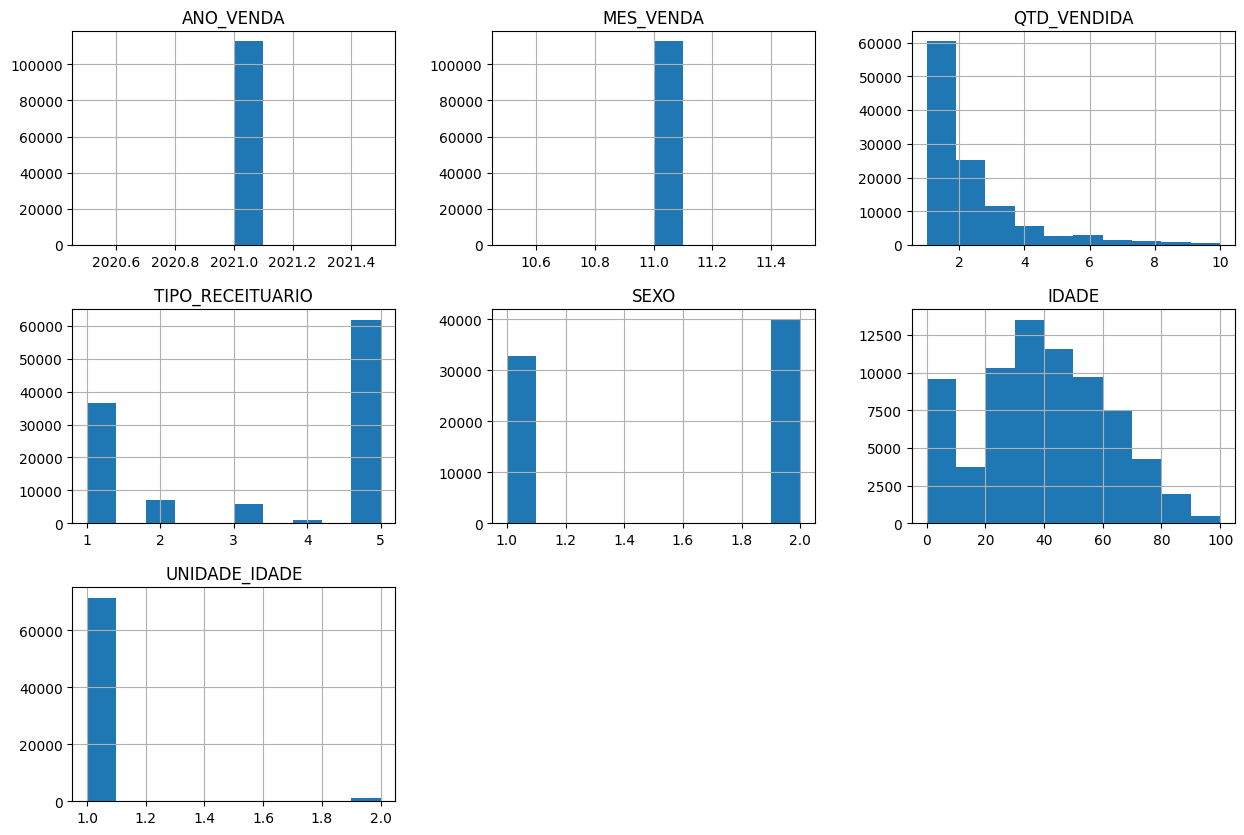

In [10]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.IDADE > 100].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.QTD_VENDIDA > 10].index, axis=0, inplace=True)

# remover `CID10`, pois está majoritariamente vazio
df_clean.drop('CID10', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=10, figsize=(15,10));


Podemos notar que agora temos uma distribuição de idade mais real.

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz

In [11]:
# criar uma matriz de correlação
corr = df_clean[['QTD_VENDIDA', 'IDADE', 'TIPO_RECEITUARIO', 'UNIDADE_MEDIDA', 'SEXO']].corr()

display(corr)

<ipython-input-11-9482d5ebf5a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_clean[['QTD_VENDIDA', 'IDADE', 'TIPO_RECEITUARIO', 'UNIDADE_MEDIDA', 'SEXO']].corr()


,QTD_VENDIDA,IDADE,TIPO_RECEITUARIO,SEXO
QTD_VENDIDA,1.000000,0.005715,-0.304806,0.001861
IDADE,0.005715,1.000000,-0.050483,0.024158
TIPO_RECEITUARIO,-0.304806,-0.050483,1.000000,-0.067554
SEXO,0.001861,0.024158,-0.067554,1.000000




*   Observamos inicialmente que não existe uma relação entre a idade e a quantidade de vendas, bem como entre o sexo da pessoa e o tipo de receituario.



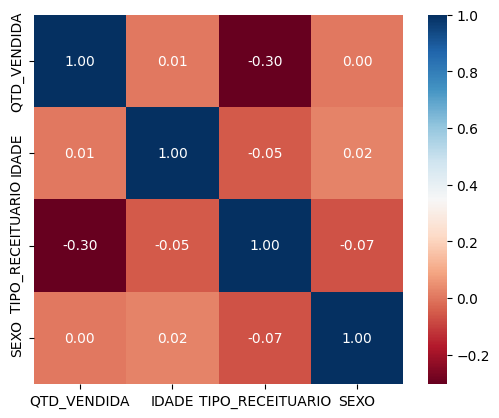

In [12]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Quais são as UFs que mais vendem**

Podemos observar que o estados que apresentam um maior número de vendas estão concentrados na região Sudeste.

In [13]:
df_clean.UF_VENDA.value_counts()

RJ    32119
SP    22461
SC    10085
MG     9730
PB     9661
ES     9110
MT     6622
PE     4350
CE     3978
MS     1623
PA     1430
TO      776
PR      572
BA       76
Name: UF_VENDA, dtype: int64

Onde **Rio de Janeiro** e **São Paulo**, juntos concetram cerca de **51% das vendas**

In [14]:
(df_clean.UF_VENDA.value_counts()/df_clean.shape[0])*100

RJ    28.526640
SP    19.948842
SC     8.957040
MG     8.641745
PB     8.580462
ES     8.091089
MT     5.881360
PE     3.863473
CE     3.533079
MS     1.441475
PA     1.270061
TO     0.689208
PR     0.508024
BA     0.067500
Name: UF_VENDA, dtype: float64

### **Q6.  Medicamentos mais populares**

*  Por `princípio ativo`



In [15]:
df_clean['PRINCIPIO_ATIVO'].value_counts()

AZITROMICINA DI-HIDRATADA                                6370
AMOXICILINA TRI-HIDRATADA                                4456
AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO      4109
OXALATO DE ESCITALOPRAM                                  2906
AMOXICILINA + CLAVULANATO DE POTÁSSIO                    2855
                                                         ... 
DICLORIDRATO DE LEVOCETIRIZINA                              1
BENZILPENICILINA BENZATINA                                  1
BROMIDRATO DE GALANTAMINA + BROMIDRATO DE GALANTAMINA       1
CLORIDRATO DE PIOGLITAZONA                                  1
TETRACICLINA                                                1
Name: PRINCIPIO_ATIVO, Length: 319, dtype: int64



*   Por `descrição`



In [16]:
df_clean['DESCRICAO_APRESENTACAO'].value_counts()

500 MG CAP DURA CT BL AL PLAS TRANS X 21                  3336
500 MG COM REV CT BL AL PLAS TRANS X 14                   2284
500 MG COM REV CT BL AL PLAS PVC TRANS X 5                1168
875 MG + 125 MG COM REV CT FR VD AMB X 14                 1162
500 MG COM CT BL AL PLAS TRANS X 10                       1145
                                                          ... 
10 MG COM CT BL AL PLAS OPC X 30                             1
7,5 MG/G GEL CT BG AL X 30 G                                 1
1,0MG+2,5MG+0,25MG+100 000 UI POM DERM CT BG AL X 30 G       1
35 MG COM REV CT BL AL PLAS OPC X 4                          1
0,6 U/G + 0,01 G POM DERM CT BG AL X 50 G + ESP              1
Name: DESCRICAO_APRESENTACAO, Length: 1959, dtype: int64

### **Q7. Medicamentos mais vendidos por localidade**

In [19]:
df_clean.groupby(['UF_VENDA']).DESCRICAO_APRESENTACAO.value_counts().sort_values(ascending=False)

UF_VENDA  DESCRICAO_APRESENTACAO                                                           
SP        500 MG CAP DURA CT BL AL PLAS TRANS X 21                                             967
RJ        500 MG CAP DURA CT BL AL PLAS TRANS X 21                                             819
SP        500 MG COM REV CT BL AL PLAS TRANS X 14                                              653
SC        500 MG CAP DURA CT BL AL PLAS TRANS X 21                                             409
RJ        500 MG COM REV CT BL AL PLAS TRANS X 14                                              401
                                                                                              ... 
MG        0,250 MG/ML + 10.000 UI/ML + 3,500 MG/ML + 20 MG/ML SOL CT FR GOT PLAS OPC X 5 ML      1
          (250 MG + 62,5 MG)/5ML PO SUS OR CT FR VD AMB X 75 ML                                  1
          (10,0 + 20,0) MG COM REV CT BL AL PLAS PVC/PVDC TRANS X 30                             1
          (1 MG +

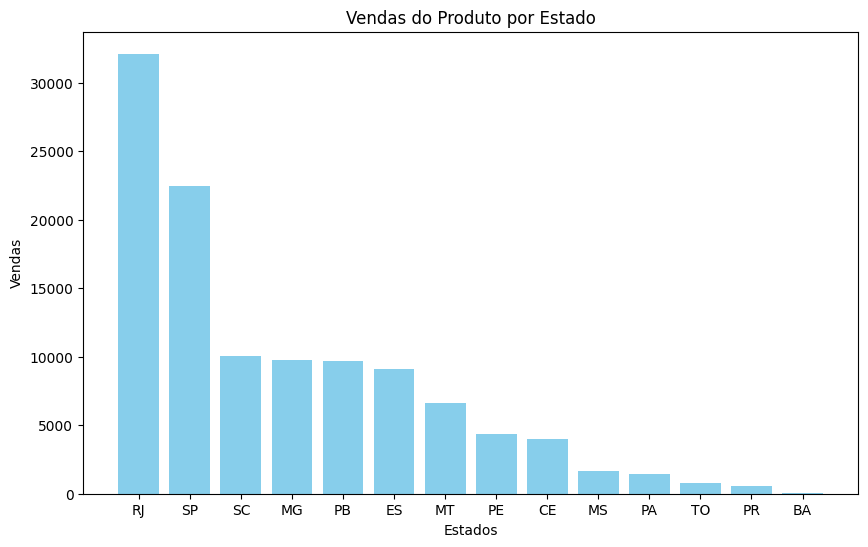

In [45]:
tabela_serie = df_clean.UF_VENDA.value_counts()
indices = tabela_serie.index.tolist()
valores = tabela_serie.tolist()
plt.figure(figsize=(10,6))
plt.bar(indices,valores, color='skyblue')
plt.xlabel('Estados')
plt.ylabel('Vendas')
plt.title('Vendas do Produto por Estado')
plt.show()


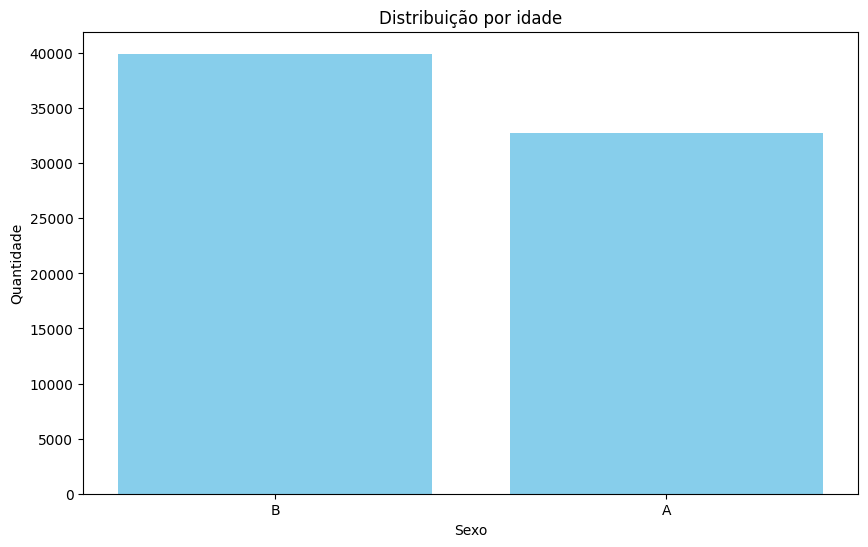

In [49]:
df_clean.SEXO = df_clean.SEXO.replace({1: 'A', 2: 'B'})
tabela_serie = df_clean.SEXO.value_counts()
indices = tabela_serie.index.tolist()
valores = tabela_serie.tolist()
plt.figure(figsize=(10,6))
plt.bar(indices,valores, color='skyblue')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Distribuição por idade')
plt.show()